# Correlation between MAF and cs size

In [1]:
import polars as pl
from scipy.stats import pearsonr
from statsmodels import api as sm
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
dataset = pl.read_parquet("../../data/rescaled-betas.parquet")


In [4]:
data = (
    dataset.select("majorPopulationMAF", "credibleSetSize")
    .filter(pl.col("majorPopulationMAF").is_not_nan())
    .to_pandas()
)


In [5]:
pearsonr(data["majorPopulationMAF"], data["credibleSetSize"])


PearsonRResult(statistic=0.023887419947640782, pvalue=0.0)

Very weak correlation between MAF and cs size. The correlation is positive, but very weak.

In [6]:
x = data["majorPopulationMAF"]
# y = np.log(data["credibleSetSize"]) + 1
y = data["credibleSetSize"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        credibleSetSize   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1496.
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        01:43:18   Log-Likelihood:            -1.5447e+07
No. Observations:             2619406   AIC:                         3.089e+07
Df Residuals:                 2619404   BIC:                         3.089e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.7665      0

The correlation R^2 is 0.01, which means that only 1% of the variance in the cs size can be explained by MAF. This is a very low value, indicating that the two variables are not strongly related.

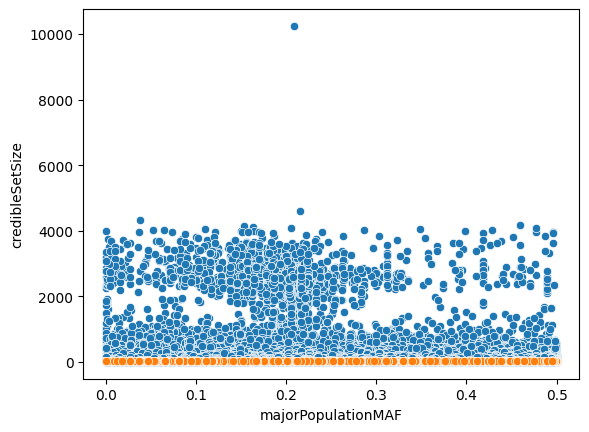

In [ ]:
sns.scatterplot(data=data, x="majorPopulationMAF", y="credibleSetSize")
y_pred = model.predict(x)
sns.scatterplot(data=data, x="majorPopulationMAF", y=y_pred)
plt.show()
